In [ ]:
!pip install wordcloud
from collections import Counter
from wordcloud import WordCloud
import jieba.posseg as pseg
import matplotlib.pyplot as plt

正在生成词云：于连


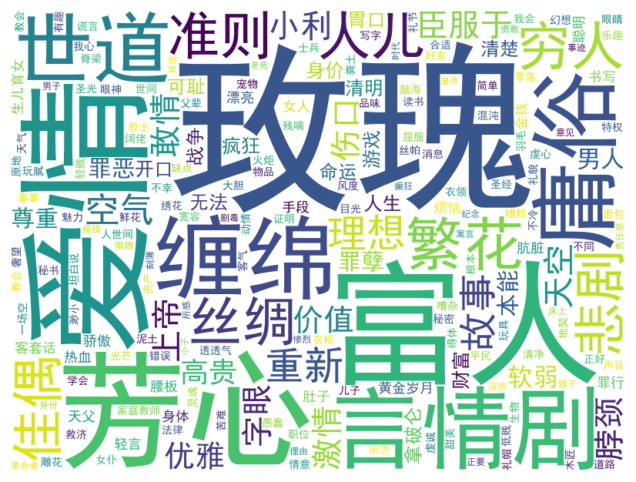

正在生成词云：玛蒂尔德


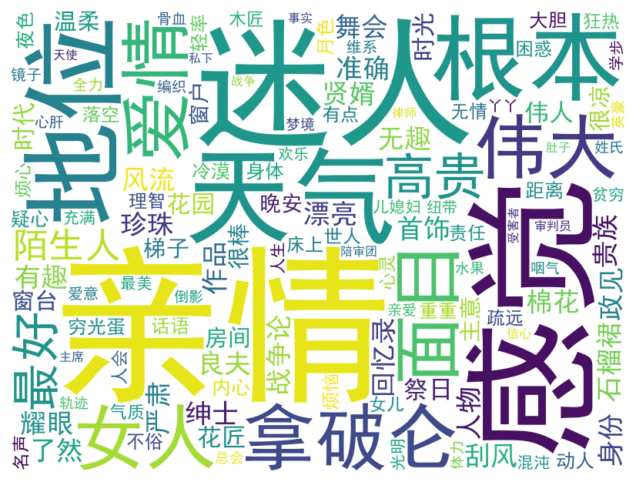

正在生成词云：德瑞纳夫人


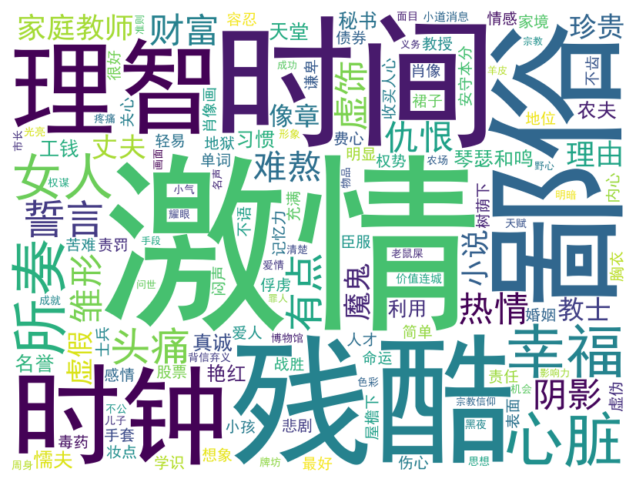

In [7]:
import re
import jieba
import jieba.posseg as pseg
from collections import defaultdict, Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

characters = ["于连", "玛蒂尔德", "德瑞纳夫人"]

aliases = {
    "玛蒂尔德": ["玛娣儿特", "玛蒂尔德", "玛蒂尔黛"],
    "德瑞纳夫人": ["瑞那夫人", "德瑞纳夫人", "特·瑞那夫人"],
    "于连": ["于连", "于连·索雷尔", "于连·S"]
}

def load_stopwords(path="stopwords.txt"):
    st = set()
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            w = line.strip()
            if w:
                st.add(w)
    return st

stopwords = load_stopwords("stopwords.txt")

color_words = set(["红", "黑", "白", "怨气", "露易丝", "朋友", "强大", "段落", "乐园","尽失","无聊","躲开","孩子","看到","世界","没有","没劲","父亲","先生","小姐","夫人","侍女","父亲","母亲","兄弟","姐姐","弟弟","重要","幸好","不错","看","世界"])

allowed_flags = {"n" , "a"}

text = open("歌剧剧本.txt", "r", encoding="utf-8").read()
for main, alias_list in aliases.items():
    for a in alias_list:
        text = text.replace(a, main)

role_blocks = defaultdict(list)
current_role = None

for line in text.split("\n"):
    clean = line.strip()
    if not clean:
        continue

    if clean in characters:
        current_role = clean
        continue

    m = re.match(r"^(.*?)[：:](.*)$", clean)
    if m:
        role = m.group(1).strip()
        content = m.group(2).strip()
        if role in characters:
            current_role = role
            role_blocks[current_role].append(content)
        continue

    if current_role:
        role_blocks[current_role].append(clean)

role_counters = {}

for role, blocks in role_blocks.items():
    full_text = " ".join(blocks)
    words = pseg.cut(full_text)
    counter = Counter()

    for w, flag in words:
        if len(w) <= 1:
            continue
        if w in stopwords:
            continue
        if w in color_words:
            continue
        if flag not in allowed_flags:
            continue
        counter[w] += 1

    role_counters[role] = counter

for role in characters:
    counter = role_counters.get(role)
    if not counter:
        print(f"{role} 没有可用内容")
        continue

    print(f"正在生成词云：{role}")

    wc = WordCloud(
        font_path="simhei.ttf",
        width=800,
        height=600,
        background_color="white"
    ).generate_from_frequencies(counter)

    plt.figure(figsize=(8, 6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

